**Date:** 26th October 2018
<br></br>
<br></br>
**<center>National Research University Higher School of Economics</center>**
**<center>Complex Calculations Programming</center>**

In [1]:
from scipy.integrate import dblquad, tplquad, nquad, quadrature
import math
import random
import sympy
import sobol_seq
from scipy.misc import derivative

import numpy as np

import matplotlib.pyplot as plt
# plt.style.use('ggplot')
%matplotlib notebook

_______
### Task 1
Implement integration over a rectangular domain with a double Legendre quadrature.
______

#### Example: 2D integrals over a rectangular domain

$$
I[f] = \int_0^{1}\!\int_0^{1}\! f(x, y)\, dy\, dx \;.
$$

Use a Gauss-Legendre quadrature (weight function $=1$) for both $x$ and $y$:

$$
Q[f] = \sum_{j=0}^{m} \sum_{k=0}^{n} f(x_j, y_k)\, w_j^{(x)} \, w_k^{(y)}
$$

In [386]:
f = lambda x, y: 3*x + 2*y

In [338]:
def polinom(n): 
    first = 1 / (2**n * math.factorial(n))
    
    x = sympy.Symbol('x')
    second = (x**2 - 1)**n
    f_second = second.diff(x, n)
    
    return first*f_second

In [339]:
# n, m = 100,100

# x = sympy.Symbol('x')
# p_dotX = polinom(n)
# P_n_dotX = sympy.lambdify(x, p_dotX)
# P_prev_n_dotX = sympy.lambdify(x, p_dotX.diff(x, 1))

# p_dotY = polinom(m)
# P_n_dotY = sympy.lambdify(x, p_dotY)
# P_prev_n_dotY = sympy.lambdify(x, p_dotY.diff(x, 1))

In [349]:
result = 0
# a, b = 0, 1
Rx = [0,1]
Ry = [0,1]

h_n = (Rx[1] - Rx[0]) / n
h_m = (Ry[1] - Ry[0]) / m
     
for j in range(0, n):
    x_j = Rx[0] + h_n * (j + 0.5)
#     P_n = P_n_dotX(x_j)
#     P_prev_n = P_prev_n_dotX(x_j)
#     dP = (n/(1 - x_j**2)) * (P_prev_n - x_j * P_n)
#     w_j = 2 / ((1 - x_j**2) * dP**2)
    for k in range(0, m):      
        y_k = Ry[0] + h_m * (k + 0.5)
#         P_n = P_n_dotY(y_k)
#         P_prev_n = P_prev_n_dotY(y_k)
#         dP = (n/(1 - y_k**2)) * (P_prev_n - y_k * P_n)
#         w_k = 2 / ((1 - y_k**2) * dP**2)
        result += f(x_j, y_k) * h_n * h_m

In [350]:
result

2.4999999999999973

Comparison with calculation of double integral via scipy.integrate

In [337]:
res = dblquad(f, 0, 1, lambda x: 0, lambda x: 1)
print()

(2.5, 3.880959068587106e-14)

____
### Task 2
Implement integration over a trangular domain with a mixed Legendre/Jacobi quadrature. 
___

The function below computes double integral over a triangular region using the cubic formula-case. The triangle is defined by its corner
coordinate arrays xc and yc, where the coordinates are listed in a counterclockwise order around the triangle.

    from "Numerical Methods in Engineering with Python 3", Jaan Kiusalaas, page 241

In [57]:
f = lambda x, y: (x**2 + y**2)/2 - \
                 (x**3 - 3 * x * y**2)/6 - 2/3

In [58]:
xc = [-1, -1, 2]
yc = [np.sqrt(3), -np.sqrt(3),  0]
result = 0

alpha = np.array([[1/3, 1/3, 1/3], \
                    [0.2, 0.2, 0.6], \
                    [0.6, 0.2, 0.2], \
                    [0.2, 0.6, 0.2]])

W = np.array([-27/48, 25/48, 25/48, 25/48])

x = np.dot(alpha,xc)
y = np.dot(alpha,yc)

A = (xc[1]*yc[2] - xc[2]*yc[1] \
    - xc[0]*yc[2] + xc[2]*yc[0] \
    + xc[0]*yc[1] - xc[1]*yc[0])/2

for i in range(4):
    result = result + W[i] * f(x[i], y[i])

Result:

In [496]:
result*A

-1.5588457268119895

____
### Task 3 (the odd one)
Repeat the Buffon's needle experiment for a range of $N$. Study the convergence of the result to the correct answer. Compare your findings to the CLT prediction, the $\sqrt{N}$ dependence.
____

- https://www.uzh.ch/cmsssl/physik/dam/jcr:8ef65f81-f446-4b2c-909a-f94d0c0734c4/EMPP_lec1.pdf 
- https://en.wikipedia.org/wiki/Buffon%27s_needle

The needle crosses a horizontal line if

$$x \le \frac{l}{2}\cos\theta$$

In [2]:
'''
n = number of throws
attempts = number of attempts
l = length of needle
d = distance between horizontal lines
theta = angle between needle and horizontal line
needle_center = center of needles on floor

nhits <===  number of hits of needle centered at x, 
with orientation theta

nhits = 1 if x < l/2 and abs(theta) < arcos(x/(l/2))
      = 0 otherwise
'''

def buffon_needle_experiment(n, attempts, l, d):
    data = []
    print ('Attempt \t Number Hits \t estimate of pi \t error')
    for j in range(attempts):
        nhits = 0
        for _ in range(n):
#             0 < needle_center < d/2
            needle_center = random.uniform(0, d/2.0)
#             0  < theta < pi/2
            theta = random.uniform(0, np.pi/2)
            dist  = needle_center - (l/2)*np.cos(theta) 
            if dist < 0 :
                nhits += 1
        estimate_pi = (2 * l * n)/(d * nhits)
        print('%i \t\t %i \t\t %.5f \t\t %.5f'%(j+1, nhits, estimate_pi, np.pi - estimate_pi))
        data.append([j, nhits])
    return data
        

attempts = 7
n = 4000
l = 2  # needle's length 2
d = 2  # spacing between horizontal lines, length

hits= buffon_needle_experiment(n, attempts , l, d)

Attempt 	 Number Hits 	 estimate of pi 	 error
1 		 2545 		 3.14342 		 -0.00183
2 		 2524 		 3.16957 		 -0.02798
3 		 2560 		 3.12500 		 0.01659
4 		 2612 		 3.06279 		 0.07881
5 		 2524 		 3.16957 		 -0.02798
6 		 2579 		 3.10198 		 0.03962
7 		 2567 		 3.11648 		 0.02511


____
### Task 5
Use the Sobol sequence to calculate the value of
$$\iint\limits_D e^{-(x^2 + y^2)}dxdy$$
where $D$ is the unit square. Compare to the exact answer (which can be expressed in terms of the error function).
____

Here $\mathcal{D}$ is the inside of a unit square, $\{(x, y): xy < 1 \}$, and $A(x, y) = e^{-(x^2+y^2)}$.

In [62]:
f = lambda x, y: np.exp(-(x**2 + y**2))

In [73]:
answer = dblquad(f, 0, 1, lambda x: 0, lambda x: 1)
print(answer)

(0.5577462853510337, 8.291374381535408e-15)


In [65]:
def inside(x, y, r):
    return x * y < r

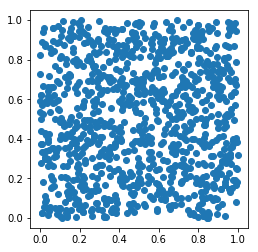

In [66]:
rndm = np.random.RandomState(12345)

x, y = rndm.uniform(low=0, high=1, size=(2, 1000))
m = inside(x, y, 1)

fig, ax = plt.subplots()
ax.plot(x[m], y[m], 'o')
ax.plot(x[~m], y[~m], 'o')
ax.set_aspect('equal')

In [96]:
def sample(n, r=1):
    n = int(n)
    x, y = sobol_seq.i4_sobol_generate(2, n).T
#     x, y = rndm.uniform(low=0, high=1, size=(2, n))
    accepted = inside(x, y, r)
    denom = accepted.sum()
    return np.sum(f(x[accepted], y[accepted]) / n), denom

In [97]:
print ('n \t result \t answer \t error')
for n in [10, 100, 1000, 10000, 100000, 1000000]:
    res = sample(n)
    err = res[0] - answer[0]
    print('%i\t %.5f \t %.5f \t %f'%(n, res[0], answer[0], err))

n 	 result 	 answer 	 error
10	 0.55918 	 0.55775 	 0.001436
100	 0.55991 	 0.55775 	 0.002163
1000	 0.55791 	 0.55775 	 0.000166
10000	 0.55781 	 0.55775 	 0.000069
100000	 0.55775 	 0.55775 	 0.000002
1000000	 0.55775 	 0.55775 	 0.000001
